In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=dataset.iloc[:,[3,4]].values

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x= sc.fit_transform(x)

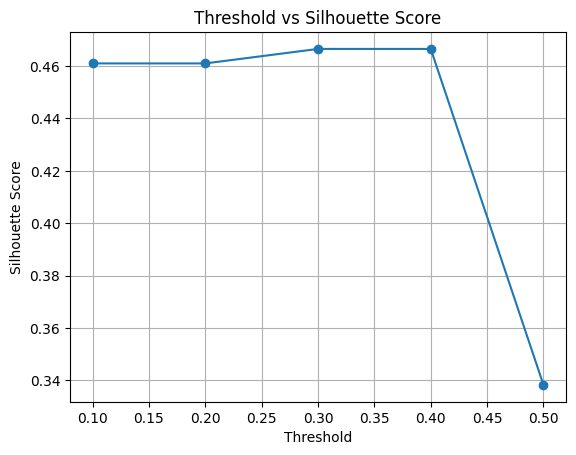

In [6]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]  
silhouette_scores = []

for t in thresholds:
    bir = Birch(threshold=t)
    bir.fit(x)
    labels = bir.labels_
    
    if len(np.unique(labels)) > 1:
        score = silhouette_score(x, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan)

plt.plot(thresholds, silhouette_scores, marker='o')
plt.title('Threshold vs Silhouette Score')
plt.xlabel('Threshold')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show() 

In [7]:
silhouette_scores

[0.4610481446570447,
 0.4610481446570447,
 0.46658474419000145,
 0.46658474419000145,
 0.3381907215114843]

In [9]:
from sklearn.cluster import Birch
bir =Birch(threshold=0.5,branching_factor=50,n_clusters=3,compute_labels=True)
label=bir.fit_predict(x)

In [10]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [11]:
supervised=dataset
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
supervised['Cluster_group']=label
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [13]:
supervised.to_csv("cluster.csv",index=False)

In [17]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [16]:
centers = bir.subcluster_centers_

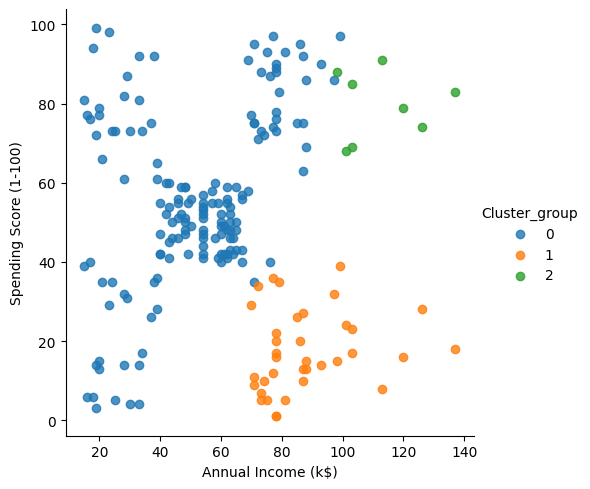

In [18]:
#seaborn use to draw plot graphical purpose
import seaborn as sns
#hue to get the color in the plot
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                  fit_reg=False,legend=True,facet_kws={'legend_out':True})

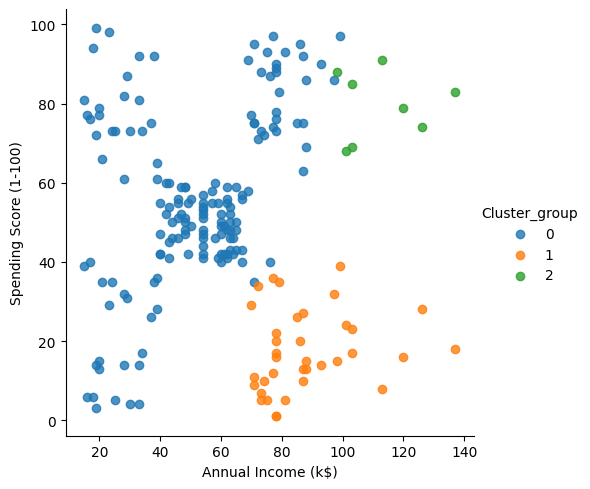

In [19]:
#altering code
#seaborn use to draw plot graphical purpose
import seaborn as sns
#hue to get the color in the plot
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                  fit_reg=False)